# <font color='#GGE15D'>**Clustering: Kmeans**</font>

## **🔸 Imports**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import *

from mlxtend.plotting import plot_decision_regions

## **🔸 Datasets**

<font color='#EE15D'> **Note: This assignment contains 4 datasets. Example 1 is the Mall Customers dataset. Examples 2, 3, and 4 are three generated datasets.**

### Example 1

In [4]:
X = pd.read_csv('Mall_Customers.csv')
X.columns = ['customer_id', 'gender', 'age', 'annual_income', 'spending_score']
X = X.drop('customer_id', axis=1)
X['gender'] = X['gender'].map({'Male': 0, 'Female': 1})
display(X.head())


X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

X_train = X_train.values
X_test = X_test.values

X_train.shape, X_test.shape

,gender,age,annual_income,spending_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


((160, 4), (40, 4))

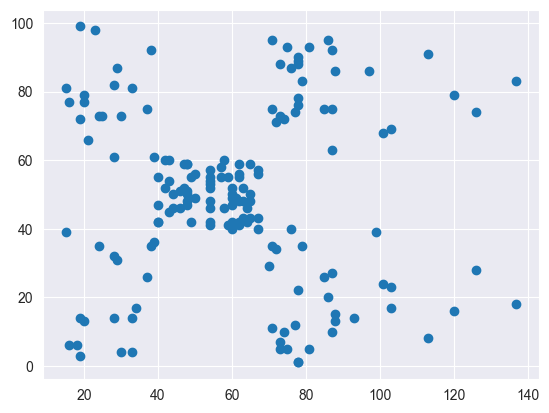

In [5]:
plt.scatter(X_train[:, -2], X_train[:, -1])

### Example 2

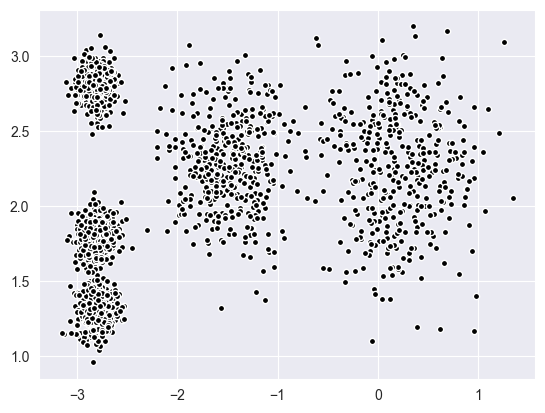

In [6]:
blob_centers = np.array([[ 0.2,  2.3],
                         [-1.5,  2.3],
                         [-2.8,  1.8],
                         [-2.8,  2.8],
                         [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X2, y2 = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.scatter(X2[:, 0], X2[:, 1], s=20, c='black', edgecolor='white')

### Example 3

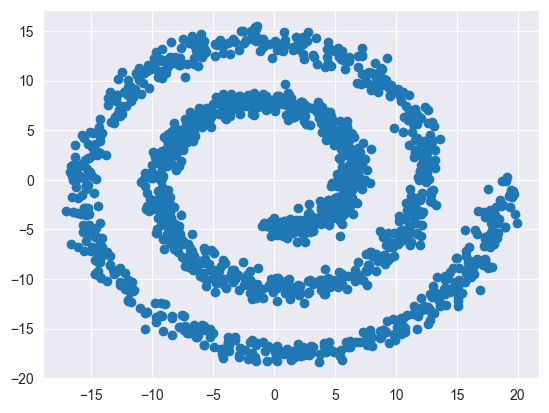

In [7]:
n_samples = 1500
np.random.seed(0)

t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X3 = np.concatenate((x, y))
X3 += 0.7 * np.random.randn(2, n_samples)
X3 = X3.T

plt.scatter(X3[:, 0], X3[:, 1])

### Example 4

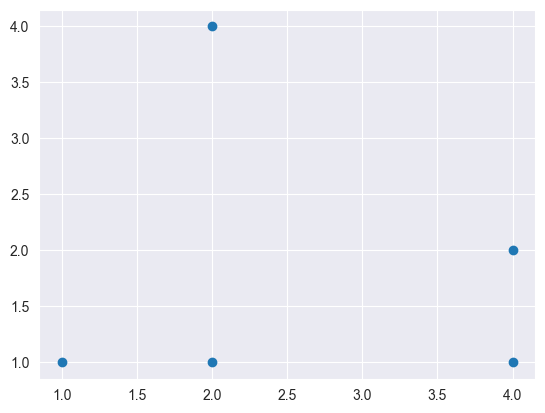

In [8]:
X4 = np.array([[1, 1], [2, 4], [2, 1], [4, 1], [4, 2]])

plt.scatter(X4[:, 0], X4[:, 1])

## **🔸 K-means**

### sklearn

In [9]:
cols = ['gender', 'age', 'annual_income', 'spending_score']
idx = [2, 3]
X = X_train[:, idx].copy()

<font color='#EE15D'>**Question1: Import Kmeans, Consider 3 different numbers of clusters: 2, 3, and 5 on X dataset. Finally, visualize the results and compare the plots.**

In [24]:
from sklearn.cluster import KMeans

n = 2  #numbers of clusters
kmeans_2 = KMeans(n_clusters=2)    #complete this code
kmeans_3 = KMeans(n_clusters=3)
kmeans_5 = KMeans(n_clusters=5)

kmeans_2.fit(X)
kmeans_3.fit(X)
kmeans_5.fit(X)
labels = kmeans_2.labels_
centroids_2 = kmeans_2.cluster_centers_
centroids_3 = kmeans_3.cluster_centers_
centroids_5 = kmeans_5.cluster_centers_
labels.shape, centroids_2.shape

((160,), (2, 2))

In [25]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Xm_2 = kmeans_2.predict(np.c_[xx.ravel(), yy.ravel()])
Xm_2 = Xm_2.reshape(xx.shape)

Xm_3 = kmeans_3.predict(np.c_[xx.ravel(), yy.ravel()])
Xm_3 = Xm_3.reshape(xx.shape)

Xm_5 = kmeans_5.predict(np.c_[xx.ravel(), yy.ravel()])
Xm_5 = Xm_5.reshape(xx.shape)

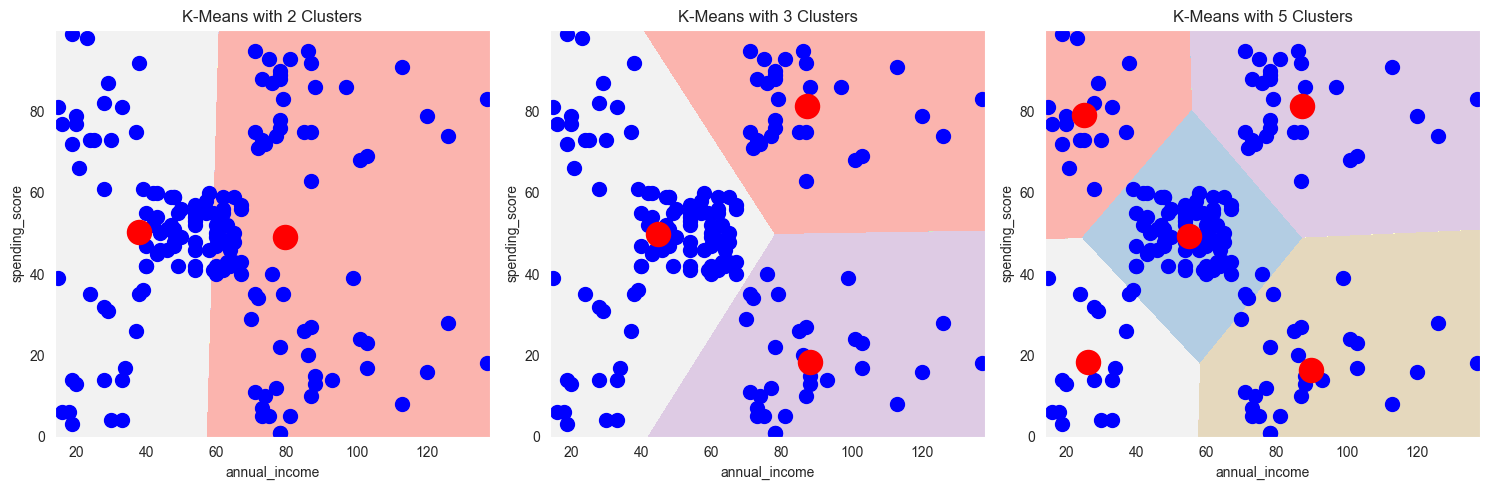

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.contourf(xx, yy, Xm_2, cmap=plt.cm.Pastel1)
plt.scatter(X[:, 0], X[:, 1], s=100, c='blue')
plt.scatter(centroids_2[: , 0], centroids_2[: , 1], s=300, c='red')
plt.xlabel(cols[idx[0]])
plt.ylabel(cols[idx[1]])
plt.title('K-Means with 2 Clusters')

#ploting k_means with 3 clusters
plt.subplot(1, 3, 2)
plt.contourf(xx, yy, Xm_3, cmap=plt.cm.Pastel1)
plt.scatter(X[:, 0], X[:, 1], s=100, c='blue')
plt.scatter(centroids_3[: , 0], centroids_3[: , 1], s=300, c='red')
plt.xlabel(cols[idx[0]])
plt.ylabel(cols[idx[1]])
plt.title('K-Means with 3 Clusters')

#ploting k-means with 5 clusters
plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Xm_5, cmap=plt.cm.Pastel1)
plt.scatter(X[:, 0], X[:, 1], s=100, c='blue')
plt.scatter(centroids_5[: , 0], centroids_5[: , 1], s=300, c='red')
plt.xlabel(cols[idx[0]])
plt.ylabel(cols[idx[1]])
plt.title('K-Means with 5 Clusters')


plt.tight_layout()
plt.show()

### Answer:

Through the plot visualization, it's possible to see that the kmeans with 2 clusters divides the data into two groups, a lower income group and a higher income group. It seems to be an oversimplification of the data.

 The kmeans with 3 clusters captures more variation of the data dividing the data into high income-high spending, high income-low spending
and low income - all types of spending.

The kmeans with 5 clusters creates 5 different groups, which from a intuitional point of view, seem to capture well the pattern of this data.


## **🔸 Elbow & Silhouette**

<font color='#EE15D'> **Question2: Elbow: Write code to compute and plot the elbow curve for the X dataset. Your final plot should match the provided output. Determine where the elbow point is.**

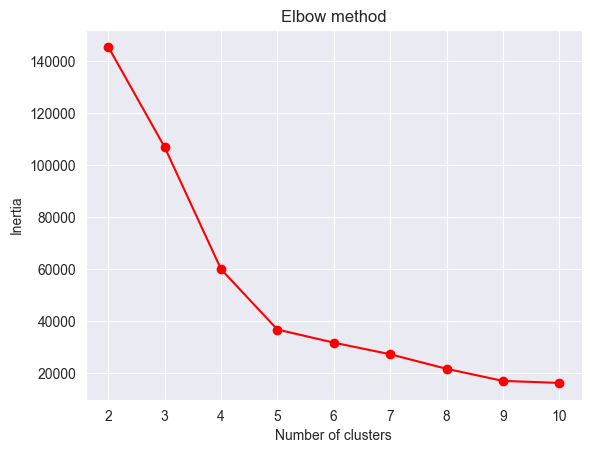

In [39]:
#Do it here
inertias = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(2,11), inertias, marker='o', color='red')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Answer:

The elbow point seems to be at the 5 clusters, as infered in the previous exercise.

### Silhouette score

<font color='#EE15D'> **Question3: Calculate sillhoutte score**

In [43]:
#Do it here
predicted_2 = kmeans_2.predict(X)
silhouette_val_2 = silhouette_score(X, predicted_2)
print("Silhouette Score for K-Means with 2 clusters:", silhouette_val_2)

predicted_3 = kmeans_3.predict(X)
silhouette_val_3 = silhouette_score(X, predicted_3)
print("Silhouette Score for K-Means with 3 clusters:", silhouette_val_3)

predicted_5 = kmeans_5.predict(X)
silhouette_val_5 = silhouette_score(X, predicted_5)
print("Silhouette Score for K-Means with 5 clusters:", silhouette_val_5)

Silhouette Score for K-Means with 2 clusters: 0.28923485642559743
Silhouette Score for K-Means with 3 clusters: 0.4684683908215398
Silhouette Score for K-Means with 5 clusters: 0.5568339240386461


## **🔸 Hierarchical Clustering**

### Example 1

<font color='#EE15D'> **Question4: Use AgglomerativeClustering of Sklearn with 5 clusters, fit on X2 data and plot it. You just need to complete agg code line**

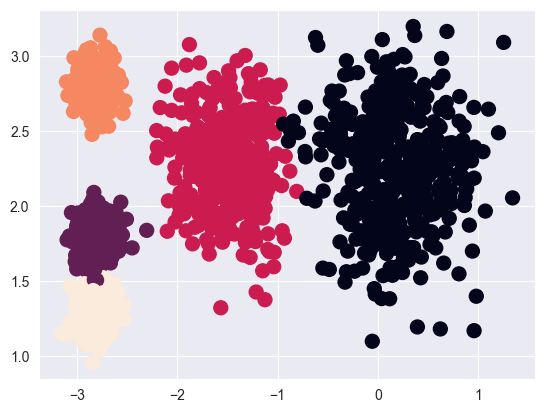

In [44]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(5)   #complete this code
agg.fit(X2)

labels = agg.labels_


plt.scatter(X2[:, 0], X2[:, 1], s=100, c=labels);

### Example 2

<font color='#EE15D'> **Question5: Apply AgglomerativeClustering on X data with 5 clusters, switch linkage between 'ward', 'single', and 'complete' and compare the plotts. Which is a better method?**

In [45]:
cols = ['gender', 'age', 'annual_income', 'spending_score']
idx = [2, 3]
X = X_train[:, idx].copy()

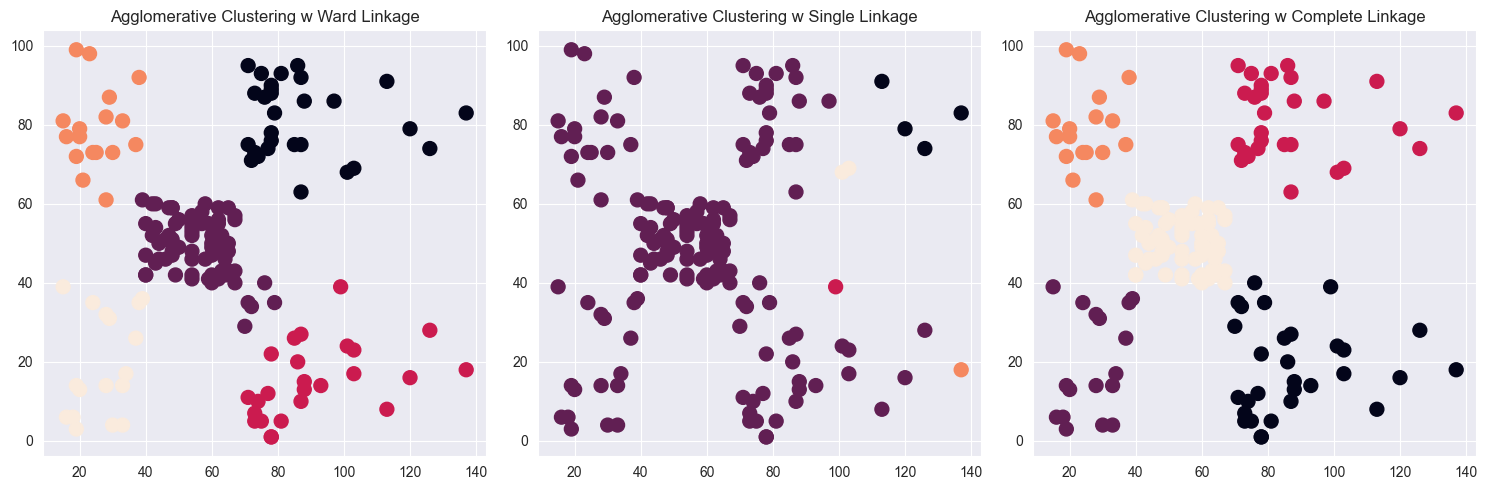

In [53]:
plt.figure(figsize=(15, 5))

#Agglomerative Clustering w Ward Linkage
agg_w = AgglomerativeClustering(5,linkage='ward')
agg_w.fit(X)
labels_w = agg_w.labels_
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], s=100, c=labels_w)
plt.title('Agglomerative Clustering w Ward Linkage')

#Agglomerative Clustering w Single Linkage
agg_s = AgglomerativeClustering(5,linkage='single')
agg_s.fit(X)
labels_s = agg_s.labels_
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], s=100, c=labels_s)
plt.title('Agglomerative Clustering w Single Linkage')

#Agglomerative Clustering w Complete Linkage
agg_c = AgglomerativeClustering(5,linkage='complete')
agg_c.fit(X)
labels_c = agg_c.labels_
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], s=100, c=labels_c)
plt.title('Agglomerative Clustering w Complete Linkage')

plt.tight_layout()
plt.show()

### Answer:

The best method seems to be the complete linkage since it seems to represent better the nature of the clusters of the data, as shown in the plots above.

### Example 3

<font color='#EE15D'> **Question6: Apply AgglomerativeClustering on X3 data with 4 clusters, and linkage = 'ward', finally visualize it**

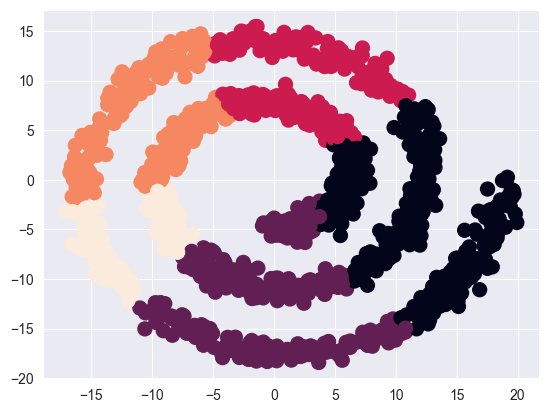

In [56]:
agg = AgglomerativeClustering(5,linkage='ward')  #complete this code
agg.fit(X3)

labels = agg.labels_

plt.scatter(X3[:, 0], X3[:, 1], s=100, c=labels);

### Dendrogram (Optional, Extra point)

For extra points, you can plot a dendrogram using Agglomerative Clustering on the X4 dataset by applying the function provided in the following link.

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

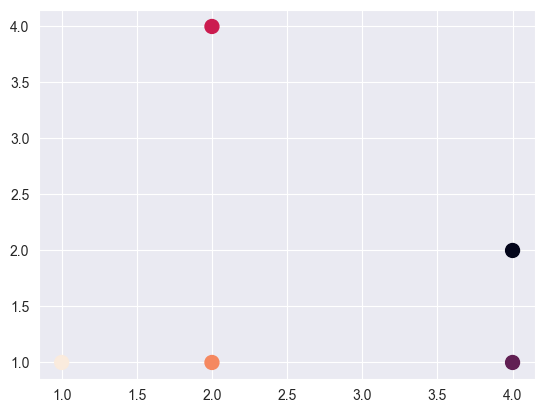

In [62]:
agg = AgglomerativeClustering(5,linkage='ward',compute_distances=True)  #complete this code
agg.fit(X4)

labels = agg.labels_

plt.scatter(X4[:, 0], X4[:, 1], s=100, c=labels);

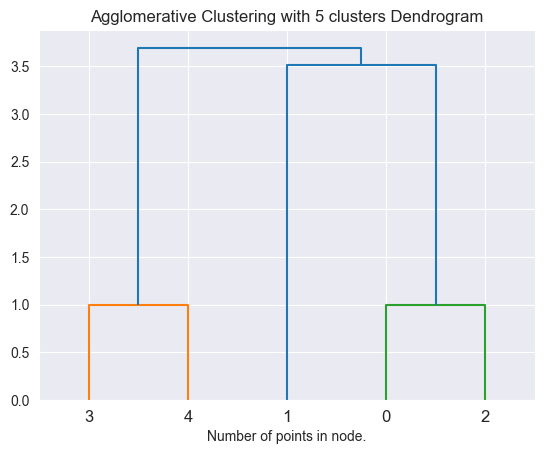

In [65]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Agglomerative Clustering with 5 clusters Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg, truncate_mode="level", p=3)
plt.xlabel("Number of points in node.")
plt.show()